# 1/ Importation du jeu de données


In [17]:
# Importation du jeu de données
import pandas as pd

# Charger le fichier CSV
df_francais = pd.read_csv('/content/francais_10000.csv')

# Afficher les premières lignes du DataFrame
print(df_francais.head())

                                            JOB_NAME  \
0  STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...   
1          Responsable d'agence / City Manager (H/F)   
2  Développeur(se) Confirmé(e) Fullstack JS (Node...   
3  💡 Business Consultant(e)  MOA - Transformation...   
4                          Junior Business Developer   

                                     JOB_DESCRIPTION  \
0  **DESCRIPTION DU POSTE**\r\n\r\nAu sein de l’é...   
1  Pour continuer à offrir un service de qualité ...   
2  * Conception et choix d’architecture\r\n* Déve...   
3  **Consultant Junior en transformation digitale...   
4  * Contrat : Stage\r\n* Temps de travail : Temp...   

                                             PROFILE IS_JOB_REMOTE  \
0  Vous recherchez un projet innovant et excitant...            no   
1  * Bac+3 minimum\n    \n* Une première expérien...      punctual   
2  * Formation en informatique ou en ingénierie o...       partial   
3  Vous avez le sens de l’analyse et l’envie d

# 4/ Prétaitement du Texte


In [18]:
df_concat=df_francais

## Pré-Processing

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter



# Prétraitement du texte
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('french'))
lemmatizer = WordNetLemmatizer()


# Définir les mots vides
stop_words = set(stopwords.words('french'))

# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Fonction de prétraitement du texte

import re

def preprocess_text(text):
    # Convertir le texte en minuscules
    text = text.lower()
    
    # Supprimer la ponctuation et les caractères spéciaux
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    
    # Supprimer les chiffres
    text = re.sub(r'\d+', '', text)
    
    # Tokenization des mots
    tokens = word_tokenize(text)
    
    # Supprimer les mots vides
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatisation des mots
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Appliquer la fonction de prétraitement sur la colonne 'Job_presentation'
df_concat['Job_presentation_processed'] = df_concat['Job_presentation'].apply(preprocess_text)


In [ ]:
df_concat['Job_presentation_processed'][0]

'stagiaire ingenieur generaliste  projet erp hf description du poste\r\n\r\nau sein de léquipe production vous travaillerez sur les missions suivantes en collaboration avec notre ingénieur polyvalent \r\n\tsimprégner du fonctionnement de lentreprise et des différents flux\r\n\tcomprendre les enjeux dun erp dans une entreprise\r\n\tdocumenter de manière précise lensemble des données de lerp\r\n\trenseignement de la stratégie de gestion des stocks selon le type darticle\r\n\tdocumenter des tutoriels ou guide des bonnes pratiques concernant les flux\r\n\tproposer des axes damélioration des flux  gestion des données\r\n\r\nvotre stage aura tout du long une forte considération des impacts écologiques du processus de fabrication de la solution vous serez dans ce cadre potentiellement amenée à participer à une analyse du bilan carbone du processus et à évaluer les gains possibles en fonction des évolutions envisagés \r\n\r\nvous travaillerez sous la direction des opérations en charge de la pr

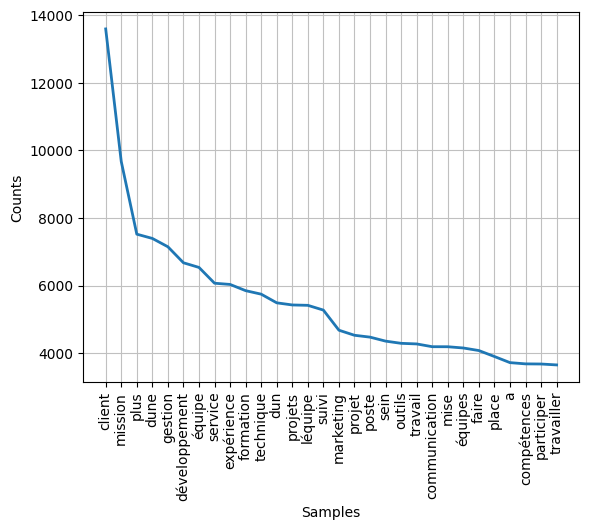

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Analyse des mots
all_words = [word for tokens in df_concat['Job_presentation_processed'] for word in tokens]
word_freq = FreqDist(all_words)


# Visualisation des mots fréquents
word_freq.plot(30, cumulative=False)
plt.show()

Visualisation des mots les plus fréquents

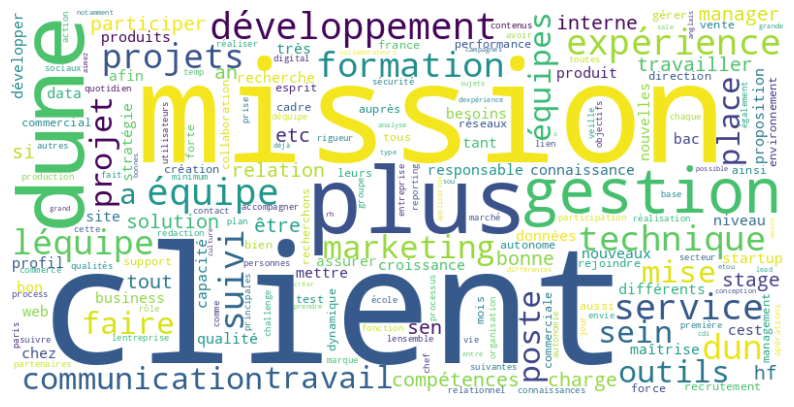

In [ ]:
from wordcloud import WordCloud

# Générer un nuage de mots à partir de la distribution de fréquence des mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Filtrer les observations dont la longueur du texte est inférieure à 100
short_presentations = df_concat[df_concat['Job_presentation_length'] < 100]['Job_presentation']

# Afficher les courtes présentations
for presentation in short_presentations:
    print(presentation)


Recetteur Service Now Redaction cahier de recette. 3 mois.
Go Live au 15/11 consultant snow
zzz- Recrutement Luxembourg - -
Dév - cand. spontanées Développeurs Développeurs
Z - Contrôle de gestion Z - Contrôle de gestion Z - Contrôle de gestion
Sécurité info xx xx
test  test  TEST 
Toulouse : Monteur Câbleur ... ...
PROFILS A CONSERVER profils divers à conserver profils divers à conserver
Sourcing design Base de candidats trouvés via le sourcing Design
Ruby On Rails Backend Developer (prospection) / 3 ans sur ROR chez un éditeur
Responsable Ressources Humaines TBC TBC
SC Prev octobre - avril (7 mois) SC
Stagiaires/Alternants automne 2023 xx xx
Candidats traités . 
Chargé(e) de communication - Alternance- Chargé(e) de communication  chargé(e) de communication 
Gérant offre directe offre directe
PIPELINE Pipeline des candidats du E2 à la PROPALE .
Vivier Préparateur de commande XX XX


In [ ]:
# Calculer la longueur de chaque texte dans la colonne 'Job_presentation'
df_concat['Job_presentation_length'] = df_concat['Job_presentation'].str.len()

# Obtenir les index des observations à supprimer
indexes_to_drop = df_concat[df_concat['Job_presentation_length'] < 100].index

# Supprimer les observations du dataframe
df_concat = df_concat.drop(indexes_to_drop)

# Réinitialiser les index du dataframe
df_concat = df_concat.reset_index(drop=True)



In [ ]:
df_concat.shape

(8044, 12)

## Encodage de IS_REMOTE

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Créer un dictionnaire personnalisé pour l'encodage souhaité
custom_mapping = {'no': 0, 'punctual': 1, 'partial': 2, 'fulltime': 3}

# Encodage des étiquettes de classe avec le dictionnaire personnalisé
df_concat['IS_JOB_REMOTE_encoded'] = df_concat['IS_JOB_REMOTE'].map(custom_mapping)

# Afficher le nouveau mapping
inverse_mapping = {v: k for k, v in custom_mapping.items()}
print(inverse_mapping)


{0: 'no', 1: 'punctual', 2: 'partial', 3: 'fulltime'}


In [ ]:
df_concat['IS_JOB_REMOTE_encoded'].value_counts()

0    4788
2    1607
1    1359
3     290
Name: IS_JOB_REMOTE_encoded, dtype: int64

In [ ]:
df_concat.head()

,JOB_NAME,JOB_DESCRIPTION,PROFILE,IS_JOB_REMOTE,Job_presentation,JOB_NAME_length,JOB_DESCRIPTION_length,PROFILE_length,Job_presentation_length,langue,Job_presentation_processed,Sentence_length,IS_JOB_REMOTE_encoded
0,STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...,**DESCRIPTION DU POSTE**\r\n\r\nAu sein de l’é...,Vous recherchez un projet innovant et excitant...,no,STAGIAIRE INGENIEUR GENERALISTE - PROJET ERP (...,50,2053,992,3097,fr,stagiaire ingenieur generaliste projet erp hf...,251,0
1,Responsable d'agence / City Manager (H/F),Pour continuer à offrir un service de qualité ...,* Bac+3 minimum\n \n* Une première expérien...,punctual,Responsable d'agence / City Manager (H/F) Pour...,41,1097,714,1854,fr,responsable dagence city manager hf pour cont...,149,1
2,Développeur(se) Confirmé(e) Fullstack JS (Node...,* Conception et choix d’architecture\r\n* Déve...,* Formation en informatique ou en ingénierie o...,partial,Développeur(se) Confirmé(e) Fullstack JS (Node...,62,610,311,985,fr,développeurse confirmée fullstack js nodejs r...,93,2
3,💡 Business Consultant(e) MOA - Transformation...,**Consultant Junior en transformation digitale...,Vous avez le sens de l’analyse et l’envie de r...,punctual,💡 Business Consultant(e) MOA - Transformation...,117,639,608,1366,fr,business consultante moa transformation dig...,114,1
4,Junior Business Developer,* Contrat : Stage\r\n* Temps de travail : Temp...,**Compétences requises :**\r\n\r\n* Fibre comm...,no,Junior Business Developer * Contrat : Stage\r\...,25,270,470,767,fr,junior business developer contrat stage\r\n ...,74,0


## train/test

In [ ]:
# Diviser les données en ensembles d'entraînement et de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_concat['Job_presentation_processed'], df_concat['IS_JOB_REMOTE_encoded'], test_size=0.2, random_state=42)


# 5/ TF-IDF

## Vectorization des mots

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Convertir chaque liste de mots en une chaîne de texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

# Créer une instance du vecteur TF-IDF
tfidf = TfidfVectorizer()

# Transformer les données d'entraînement en vecteurs TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train_text)

# Transformer les données de test en vecteurs TF-IDF
X_test_tfidf = tfidf.transform(X_test_text)

## Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression


# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_RL = model.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_RL = model.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report

# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train = classification_report(y_train, y_train_pred_RL)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test = classification_report(y_test, y_test_pred_RL)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train:")
print(classification_metrics_train)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test:")
print(classification_metrics_test)


Mesures d'évaluation spécifiques pour le train:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3834
           1       0.95      0.40      0.56      1072
           2       0.87      0.58      0.69      1297
           3       0.95      0.16      0.27       232

    accuracy                           0.78      6435
   macro avg       0.88      0.53      0.59      6435
weighted avg       0.81      0.78      0.75      6435

Mesures d'évaluation spécifiques pour le test:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       954
           1       0.60      0.16      0.25       287
           2       0.49      0.29      0.36       310
           3       1.00      0.03      0.07        58

    accuracy                           0.64      1609
   macro avg       0.69      0.36      0.36      1609
weighted avg       0.63      0.64      0.58      1609



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculer la matrice de confusion du train et du test
confusion_mat_train = confusion_matrix(y_train, y_train_pred_RL)
confusion_mat_test = confusion_matrix(y_test, y_test_pred_RL)

# Afficher la matrice de confusion du train
print("Matrice de confusion du train:")
print(confusion_mat_train)

# Afficher la matrice de confusion du test
print("Matrice de confusion du test:")
print(confusion_mat_test)

Matrice de confusion du train:
[[3807   11   16    0]
 [ 606  424   42    0]
 [ 539    5  751    2]
 [ 130    7   59   36]]
Matrice de confusion du test:
[[901  19  34   0]
 [202  45  40   0]
 [211  10  89   0]
 [ 37   1  18   2]]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Créer un modèle Random Forest avec des paramètres de régularisation
model_rf = RandomForestClassifier(n_estimators=100)
# Entraîner le modèle sur les données d'entraînement
model_rf.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_rf = model_rf.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_rf = model_rf.predict(X_test_tfidf)


KeyboardInterrupt: ignored

In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_rf = classification_report(y_train, y_train_pred_rf)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_rf = classification_report(y_test, y_test_pred_rf)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec Random Forest:")
print(classification_metrics_train_rf)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec Random Forest:")
print(classification_metrics_test_rf)

In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec Random Forest:")
print(confusion_matrix_train_rf)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec Random Forest:")
print(confusion_matrix_test_rf)

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle XGBoost
model_xgb = xgb.XGBClassifier()

# Entraîner le modèle sur les données d'entraînement
model_xgb.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_xgb = model_xgb.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_xgb = model_xgb.predict(X_test_tfidf)

In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_xgb = classification_report(y_train, y_train_pred_xgb)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_xgb = classification_report(y_test, y_test_pred_xgb)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec XGBoost:")
print(classification_metrics_train_xgb)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec XGBoost:")
print(classification_metrics_test_xgb)


In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec XGBoost:")
print(confusion_matrix_train_xgb)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec XGBoost:")
print(confusion_matrix_test_xgb)

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle SVM
model_svm = SVC()

# Entraîner le modèle sur les données d'entraînement
model_svm.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_svm = model_svm.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_svm = model_svm.predict(X_test_tfidf)


In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_svm = classification_report(y_train, y_train_pred_svm)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_svm = classification_report(y_test, y_test_pred_svm)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec SVM:")
print(classification_metrics_train_svm)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec SVM:")
print(classification_metrics_test_svm)


In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_svm = confusion_matrix(y_train, y_train_pred_svm)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec SVM:")
print(confusion_matrix_train_svm)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec SVM:")
print(confusion_matrix_test_svm)

## Linear SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle SVM linéaire
model_lsvc = SVC(kernel='linear')

# Entraîner le modèle sur les données d'entraînement
model_lsvc.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_lsvc = model_lsvc.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_lsvc = model_lsvc.predict(X_test_tfidf)


In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_lsvc = classification_report(y_train, y_train_pred_lsvc)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_lsvc = classification_report(y_test, y_test_pred_lsvc)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec SVM:")
print(classification_metrics_train_lsvc)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec SVM:")
print(classification_metrics_test_lsvc)

Mesures d'évaluation spécifiques pour le train avec SVM:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3834
           1       0.95      0.57      0.71      1072
           2       0.93      0.71      0.81      1297
           3       0.98      0.53      0.69       232

    accuracy                           0.85      6435
   macro avg       0.92      0.70      0.77      6435
weighted avg       0.87      0.85      0.84      6435

Mesures d'évaluation spécifiques pour le test avec SVM:
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       954
           1       0.60      0.19      0.29       287
           2       0.46      0.27      0.34       310
           3       0.88      0.12      0.21        58

    accuracy                           0.64      1609
   macro avg       0.65      0.38      0.41      1609
weighted avg       0.63      0.64      0.59      1609



In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_svm = confusion_matrix(y_train, y_train_pred_lsvc)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_svm = confusion_matrix(y_test, y_test_pred_lsvc)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec SVM:")
print(confusion_matrix_train_lsvc)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec SVM:")
print(confusion_matrix_test_lscv)

## Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle Multinomial Naive Bayes
model_nb = MultinomialNB()

# Entraîner le modèle sur les données d'entraînement
model_nb.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_nb = model_nb.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_nb = model_nb.predict(X_test_tfidf)


In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_nb = classification_report(y_train, y_train_pred_nb)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_nb = classification_report(y_test, y_test_pred_nb)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec Multinomial Naive Bayes:")
print(classification_metrics_train_nb)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec Multinomial Naive Bayes:")
print(classification_metrics_test_nb)


Mesures d'évaluation spécifiques pour le train avec Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      3834
           1       1.00      0.01      0.02      1072
           2       0.92      0.03      0.05      1297
           3       0.00      0.00      0.00       232

    accuracy                           0.60      6435
   macro avg       0.63      0.26      0.21      6435
weighted avg       0.71      0.60      0.46      6435

Mesures d'évaluation spécifiques pour le test avec Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       954
           1       1.00      0.01      0.01       287
           2       1.00      0.02      0.04       310
           3       0.00      0.00      0.00        58

    accuracy                           0.60      1609
   macro avg       0.65      0.26      0.20      1609
weighted avg       0.72      0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_nb = confusion_matrix(y_train, y_train_pred_nb)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_nb = confusion_matrix(y_test, y_test_pred_nb)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec Multinomial Naive Bayes:")
print(confusion_matrix_train_nb)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec Multinomial Naive Bayes:")
print(confusion_matrix_test_nb)

Matrice de confusion pour le train avec Multinomial Naive Bayes:
[[3832    0    2    0]
 [1059   12    1    0]
 [1264    0   33    0]
 [ 232    0    0    0]]
Matrice de confusion pour le test avec Multinomial Naive Bayes:
[[954   0   0   0]
 [285   2   0   0]
 [304   0   6   0]
 [ 58   0   0   0]]


## KKN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle k-plus proches voisins
model_knn = KNeighborsClassifier()

# Entraîner le modèle sur les données d'entraînement
model_knn.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_knn = model_knn.predict(X_train_tfidf)

# Prédire les étiquettes sur les données de test
y_test_pred_knn = model_knn.predict(X_test_tfidf)


In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_knn = classification_report(y_train, y_train_pred_knn)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_knn = classification_report(y_test, y_test_pred_knn)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec KNN:")
print(classification_metrics_train_knn)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec KNN:")
print(classification_metrics_test_knn)


In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_knn = confusion_matrix(y_train, y_train_pred_knn)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_knn = confusion_matrix(y_test, y_test_pred_knn)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec KNN:")
print(confusion_matrix_train_knn)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec KNN:")
print(confusion_matrix_test_knn)

## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Convertir les étiquettes en représentation one-hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Créer un modèle de réseau de neurones
model_nn = Sequential()
model_nn.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(4, activation='softmax'))

# Compiler le modèle
model_nn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Entraîner le modèle sur les données d'entraînement
model_nn.fit(X_train_tfidf, y_train_one_hot, epochs=2, batch_size=32, validation_data=(X_test_tfidf, y_test_one_hot))

# Prédire les étiquettes sur les données de test
y_pred_nn = model_nn.predict(X_test_tfidf)
y_pred_nn = tf.argmax(y_pred_nn, axis=1).numpy()

# Calculer l'accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Afficher les mesures d'évaluation spécifiques
classification_metrics_nn = classification_report(y_test, y_pred_nn)
print(classification_metrics_nn)

# Calculer la matrice de confusion
confusion_mat_nn = confusion_matrix(y_test, y_pred_nn)
print(confusion_mat_nn)


# 6/ TF-IDF pour plusieurs valleurs de n

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convertir chaque liste de mots en une chaîne de texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

# Tester différentes valeurs de n
n_values = [1, 2, 3, 4, 5]  

accuracy_scores = []

for n in n_values:
    # Créer une instance du vecteur TF-IDF avec la valeur de n correspondante
    tfidf = TfidfVectorizer(ngram_range=(1, n))

    # Transformer les données d'entraînement en vecteurs TF-IDF
    X_train_tfidf = tfidf.fit_transform(X_train_text)

    # Transformer les données de test en vecteurs TF-IDF
    X_test_tfidf = tfidf.transform(X_test_text)

    # Créer un modèle de régression logistique
    model = LogisticRegression()

    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train_tfidf, y_train)

    # Prédire les étiquettes sur les données de test
    y_pred = model.predict(X_test_tfidf)

    # Calculer l'accuracy et l'ajouter à la liste des scores
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Tracer le graphe résumant les résultats
plt.plot(n_values, accuracy_scores, marker='o')
plt.xlabel('Valeur de n')
plt.ylabel('Accuracy')
plt.title('Précision en fonction de la valeur de n')
plt.show()


# 7/ CountVectorizier

## Vectorization des mots

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Convertir chaque liste de mots en une chaîne de texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

# Créer une instance du vecteur CountVectorizer
count_vectorizer = CountVectorizer()

# Transformer les données d'entraînement en vecteurs CountVectorizer
X_train_count = count_vectorizer.fit_transform(X_train_text)

# Transformer les données de test en vecteurs CountVectorizer
X_test_count = count_vectorizer.transform(X_test_text)

## Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

# Créer un modèle de régression logistique
model_lr = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model_lr.fit(X_train_count, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_lr = model_lr.predict(X_train_count)

# Prédire les étiquettes sur les données de test
y_test_pred_lr = model_lr.predict(X_test_count)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_lr = classification_report(y_train, y_train_pred_lr)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_lr = classification_report(y_test, y_test_pred_lr)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec Régression Logistique:")
print(classification_metrics_train_lr)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec Régression Logistique:")
print(classification_metrics_test_lr)

Mesures d'évaluation spécifiques pour le train avec Régression Logistique:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3834
           1       1.00      1.00      1.00      1072
           2       1.00      1.00      1.00      1297
           3       1.00      1.00      1.00       232

    accuracy                           1.00      6435
   macro avg       1.00      1.00      1.00      6435
weighted avg       1.00      1.00      1.00      6435

Mesures d'évaluation spécifiques pour le test avec Régression Logistique:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       954
           1       0.39      0.34      0.37       287
           2       0.39      0.37      0.38       310
           3       0.50      0.24      0.33        58

    accuracy                           0.61      1609
   macro avg       0.50      0.44      0.46      1609
weighted avg       0.60      0.61   

In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_lr = confusion_matrix(y_train, y_train_pred_lr)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_lr = confusion_matrix(y_test, y_test_pred_lr)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec Régression Logistique:")
print(confusion_matrix_train_lr)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec Régression Logistique:")
print(confusion_matrix_test_lr)

Matrice de confusion pour le train avec Régression Logistique:
[[3830    3    1    0]
 [   2 1070    0    0]
 [   0    0 1297    0]
 [   1    0    0  231]]
Matrice de confusion pour le test avec Régression Logistique:
[[756  92 103   3]
 [122  99  61   5]
 [139  49 116   6]
 [ 14  12  18  14]]


## Random Forest

In [ ]:
# Créer un modèle Random Forest
model_rf = RandomForestClassifier(1000)

# Entraîner le modèle sur les données d'entraînement
model_rf.fit(X_train_count, y_train)

# Prédire les étiquettes sur les données de train
y_train_pred_rf = model_rf.predict(X_train_count)

# Prédire les étiquettes sur les données de test
y_test_pred_rf = model_rf.predict(X_test_count)

In [ ]:
# Calculer les mesures d'évaluation spécifiques sur le train
classification_metrics_train_rf = classification_report(y_train, y_train_pred_rf)

# Calculer les mesures d'évaluation spécifiques sur le test
classification_metrics_test_rf = classification_report(y_test, y_test_pred_rf)

# Afficher les mesures d'évaluation spécifiques pour le train
print("Mesures d'évaluation spécifiques pour le train avec Random Forest:")
print(classification_metrics_train_rf)

# Afficher les mesures d'évaluation spécifiques pour le test
print("Mesures d'évaluation spécifiques pour le test avec Random Forest:")
print(classification_metrics_test_rf)


Mesures d'évaluation spécifiques pour le train avec Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3834
           1       1.00      1.00      1.00      1072
           2       1.00      1.00      1.00      1297
           3       1.00      1.00      1.00       232

    accuracy                           1.00      6435
   macro avg       1.00      1.00      1.00      6435
weighted avg       1.00      1.00      1.00      6435

Mesures d'évaluation spécifiques pour le test avec Random Forest:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       954
           1       0.88      0.15      0.25       287
           2       0.73      0.15      0.25       310
           3       0.75      0.16      0.26        58

    accuracy                           0.65      1609
   macro avg       0.75      0.36      0.38      1609
weighted avg       0.70      0.65      0.56      160

In [ ]:
# Calculer la matrice de confusion pour le train
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)

# Calculer la matrice de confusion pour le test
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Afficher la matrice de confusion pour le train
print("Matrice de confusion pour le train avec Random Forest:")
print(confusion_matrix_train_rf)

# Afficher la matrice de confusion pour le test
print("Matrice de confusion pour le test avec Random Forest:")
print(confusion_matrix_test_rf)

Matrice de confusion pour le train avec Random Forest:
[[3832    1    1    0]
 [   1 1071    0    0]
 [   0    0 1297    0]
 [   0    0    0  232]]
Matrice de confusion pour le test avec Random Forest:
[[941   3  10   0]
 [234  41  11   1]
 [259   3  47   1]
 [ 40   2   7   9]]


#8/ word2vec

## Vectorization des mots

In [ ]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Prétraitement du texte
X_train_text = [' '.join(words) for words in X_train]
X_test_text = [' '.join(words) for words in X_test]

X_train_sentences = [text.split() for text in X_train_text]
X_test_sentences = [text.split() for text in X_test_text]

# Entraînement du modèle Word2Vec
model_w2v = Word2Vec(sentences=X_train_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Vectorisation des données
X_train_vec = np.array([np.mean([model_w2v.wv[word] for word in sentence], axis=0) for sentence in X_train_sentences])
X_test_vec = np.array([np.mean([model_w2v.wv[word] for word in sentence if word in model_w2v.wv], axis=0) for sentence in X_test_sentences])

# Division des données
y_train = np.array(y_train)
y_test = np.array(y_test)

# Modèle de régression logistique
model_lr = LogisticRegression()
model_lr.fit(X_train_vec, y_train)

# Prédiction sur les données de test
y_pred_lr = model_lr.predict(X_test_vec)

# Mesures d'évaluation spécifiques
classification_metrics_lr = classification_report(y_test, y_pred_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Affichage des mesures d'évaluation
print("Mesures d'évaluation spécifiques avec Régression Logistique :")
print(classification_metrics_lr)

# Affichage de la matrice de confusion
print("Matrice de confusion avec Régression Logistique :")
print(confusion_matrix_lr)


Mesures d'évaluation spécifiques avec Régression Logistique :
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       954
           1       0.00      0.00      0.00       287
           2       0.34      0.05      0.09       310
           3       0.00      0.00      0.00        58

    accuracy                           0.59      1609
   macro avg       0.24      0.26      0.21      1609
weighted avg       0.42      0.59      0.46      1609

Matrice de confusion avec Régression Logistique :
[[937   0  17   0]
 [278   0   9   0]
 [294   0  16   0]
 [ 53   0   5   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

# 9/ Hugging Face

In [23]:
df_concat.columns

Index(['JOB_NAME', 'JOB_DESCRIPTION', 'PROFILE', 'IS_JOB_REMOTE',
       'Job_presentation', 'JOB_NAME_length', 'JOB_DESCRIPTION_length',
       'PROFILE_length', 'Job_presentation_length', 'langue',
       'Job_presentation_processed', 'Sentence_length',
       'IS_JOB_REMOTE_encoded'],
      dtype='object')

In [25]:
# Nouveaux dataframe pour HuggingFace

# Supposons que vous souhaitez conserver les colonnes 'colonne1', 'colonne2' et 'colonne3'
df = df_concat.loc[:, ['Job_presentation', 'IS_JOB_REMOTE_encoded']]


In [26]:
!pip install datasets  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!pip install datasets  
from datasets import load_dataset
from datasets import Dataset
from datasets import DatasetDict

# Secondly, we convert the pandas dataset into a hugging-face dataset
dataset = Dataset.from_pandas(df)

# Last, we split the hugging-face dataset into a training set and a test set
dataset_train_test = dataset.train_test_split(test_size=0.20)
dataset_train_test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


DatasetDict({
    train: Dataset({
        features: ['Job_presentation', 'IS_JOB_REMOTE_encoded'],
        num_rows: 6449
    })
    test: Dataset({
        features: ['Job_presentation', 'IS_JOB_REMOTE_encoded'],
        num_rows: 1613
    })
})

In [28]:
# We import the tokenizer designed for the bert-cased model

#Import the transformer library only in Colab
!pip install transformers
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_function(example):
    return tokenizer(example, padding="max_length", truncation=True)

    
tokenized_datasets = dataset_train_test.map(tokenize_function, batched=True, input_columns='Job_presentation')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Map:   0%|          | 0/6449 [00:00<?, ? examples/s]

Map:   0%|          | 0/1613 [00:00<?, ? examples/s]

In [29]:
train_dataset = tokenized_datasets['train']
test_dataset = tokenized_datasets['test']  

In [31]:
tf_train_dataset = train_dataset.remove_columns(["Job_presentation"]).with_format("tensorflow")
tf_test_dataset = test_dataset.remove_columns(["Job_presentation"]).with_format("tensorflow")

In [34]:
import tensorflow as tf
train_features = {x: tf_train_dataset[x] for x in tokenizer.model_input_names}
#train_features = {x: tf_train_dataset[x].to_tensor() for x in tokenizer.model_input_names} for kaggle notebook
train_tf_dataset = tf.data.Dataset.from_tensor_slices((train_features, tf_train_dataset["IS_JOB_REMOTE_encoded"]))
train_tf_dataset = train_tf_dataset.shuffle(len(tf_train_dataset)).batch(8)

test_features = {x: tf_test_dataset[x] for x in tokenizer.model_input_names}
#test_features = {x: tf_test_dataset[x].to_tensor() for x in tokenizer.model_input_names} for kaggle notebook
test_tf_dataset = tf.data.Dataset.from_tensor_slices((test_features, tf_test_dataset["IS_JOB_REMOTE_encoded"]))
test_tf_dataset = test_tf_dataset.batch(8)

In [35]:
import tensorflow as tf
#!pip install transformers
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=4)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#tf.keras.metrics.Precision()
import tensorflow as tf
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.metrics.SparseCategoricalAccuracy()]
)

#model.fit(train_tf_dataset, validation_data=eval_tf_dataset, epochs=3)
model.fit(train_tf_dataset, epochs=4)

Epoch 1/4
 57/807 [=>............................] - ETA: 7:45:30 - loss: 1.1464 - sparse_categorical_accuracy: 0.5636

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_tf_dataset)